**uploading** **our** **dataset**

# **Importing** **necessary** **libraries**

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# **Cleaning and preprocessing with gaining some info about** **our** **data**

In [49]:
data = pd.read_csv('/content/salaries (2).csv')

In [50]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [52]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,16534.0,2023.226866,0.713558,2020.0,2023.0,2023.0,2024.0,2024.0
salary,16534.0,163726.962683,340205.744183,14000.0,101763.0,142200.0,187200.0,30400000.0
salary_in_usd,16534.0,149686.777973,68505.293156,15000.0,101125.0,141300.0,185900.0,800000.0
remote_ratio,16534.0,32.003750,46.245158,0.0,0.0,0.0,100.0,100.0


In [53]:
data.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [54]:
data.shape

(16534, 11)

In [55]:
# Replacing job titles that are the same with unique job title
data['job_title'] = data['job_title'].replace({'Machine Learning Engineer':'ML Engineer'})
data['job_title'] = data['job_title'].replace({'Data Science':'Data Scientist'})

In [56]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (6547, 11)


In [57]:
data.drop_duplicates(inplace=True)

In [58]:
data.shape

(9987, 11)

In [59]:
# Dropping salary and salary currency columns as there is a salary in usd column
data.drop(['salary','salary_currency'], axis = 1, inplace = True)

In [60]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,US,0,US,M
4,2024,SE,FT,ML Engineer,190000,US,0,US,M


<Axes: xlabel='salary_in_usd'>

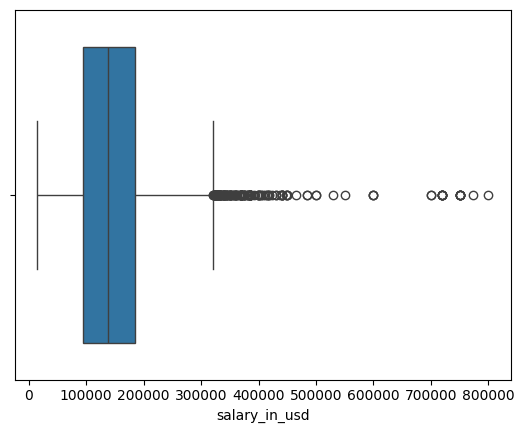

In [61]:
#detecting outliers to remove them
sns.boxplot(x=data['salary_in_usd'])

In [62]:
# finding the outlier
percentile25=data["salary_in_usd"].quantile(0.25)
percentile75=data["salary_in_usd"].quantile(0.75)
# IQR CALCULATED
iqr=percentile75 - percentile25
iqr

# checking upper and lower limit in distance variable
upper_limit=percentile75 + 1.5*iqr
lower_limit=percentile25 - 1.5*iqr
#removing the outliers
data['salary_in_usd'] = np.clip(data['salary_in_usd'], lower_limit, upper_limit)


<Axes: xlabel='salary_in_usd'>

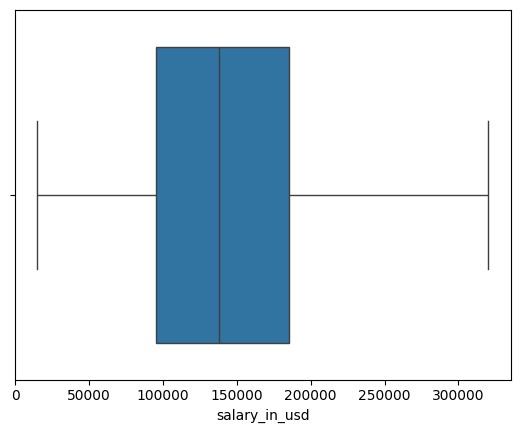

In [63]:
sns.boxplot(x=data['salary_in_usd'])

# **Visualizing data and gaining insights**

**Average Salary by Company Size**

([0, 1, 2], [Text(0, 0, 'M'), Text(1, 0, 'L'), Text(2, 0, 'S')])

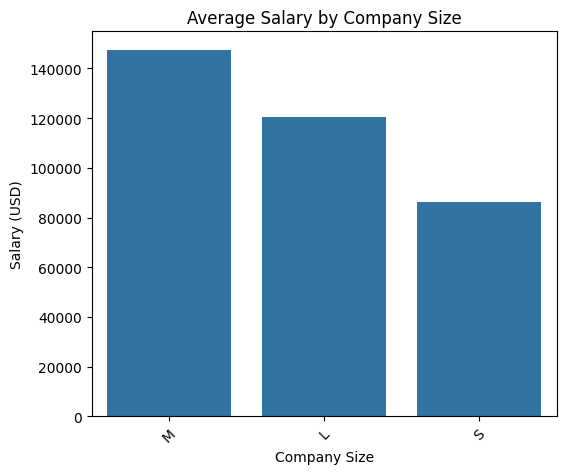

In [64]:
plt.figure(figsize=(6, 5))  # Set the figure size

# Create the bar plot
sns.barplot(x='company_size', y='salary_in_usd', data=data,errorbar=None)

plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')

plt.xticks(rotation=45)

**Average Salary by Experience Level**

([0, 1, 2, 3],
 [Text(0, 0, 'SE'), Text(1, 0, 'MI'), Text(2, 0, 'EN'), Text(3, 0, 'EX')])

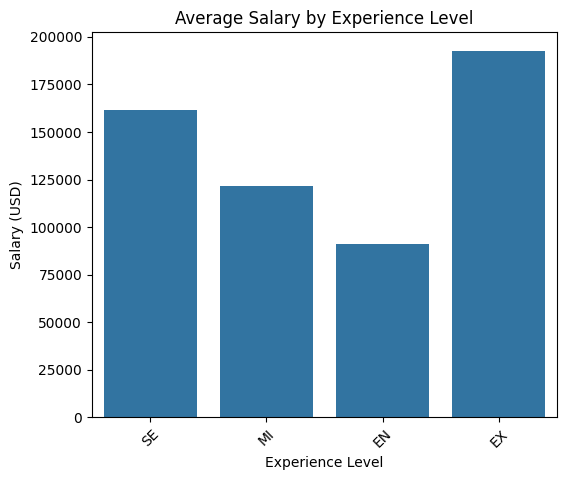

In [65]:
plt.figure(figsize=(6, 5))  # Set the figure size

# Create the bar plot
sns.barplot(x='experience_level', y='salary_in_usd', data=data,errorbar=None)

plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')

plt.xticks(rotation=45)

**Visualization of top 10 most frequent job titles**

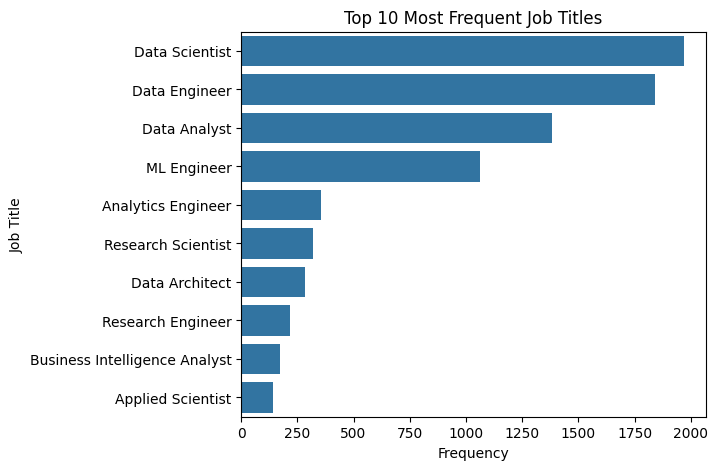

In [66]:
# Visualization of job title frequency
job_title_df = data['job_title'].value_counts()
top_n = 10
job_title_freq = job_title_df.head(top_n)

plt.figure(figsize=(6, 5))
sns.barplot(x=job_title_freq.values, y=job_title_freq.index)
plt.title(f'Top {top_n} Most Frequent Job Titles')
plt.xlabel('Frequency')
plt.ylabel('Job Title')
plt.show()

**Average salary by year**

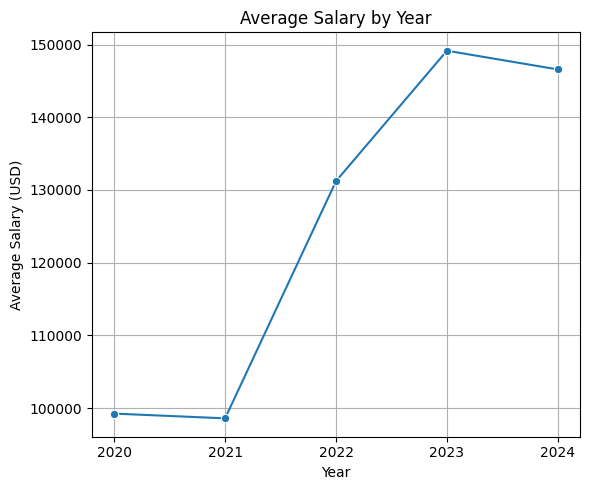

In [67]:
unique_years = sorted(data['work_year'].unique())

# Create the plot
plt.figure(figsize=(6, 5))
sns.lineplot(data=data, x='work_year', y='salary_in_usd', estimator='mean', errorbar=None,  marker='o')
plt.title('Average Salary by Year')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(unique_years)
plt.tight_layout()
plt.grid(True)
plt.show()

**Average Salary Change Over the Years for Company By Size**

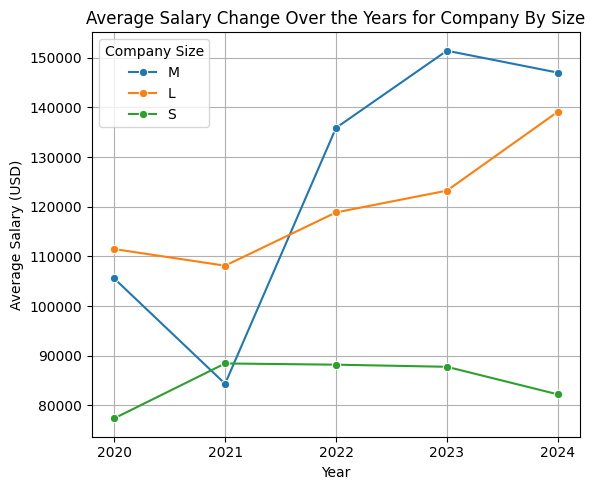

In [68]:
unique_years = sorted(data['work_year'].unique())

# Create the plot
plt.figure(figsize=(6, 5))
sns.lineplot(data=data, x='work_year', y='salary_in_usd', hue='company_size', estimator='mean', errorbar=None,  marker='o', markers=True)
plt.title('Average Salary Change Over the Years for Company By Size')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.xticks(unique_years)
plt.legend(title='Company Size')
plt.tight_layout()
plt.grid(True)
plt.show()

**Top 5 Average Salary by Job Title Among All Jobs**

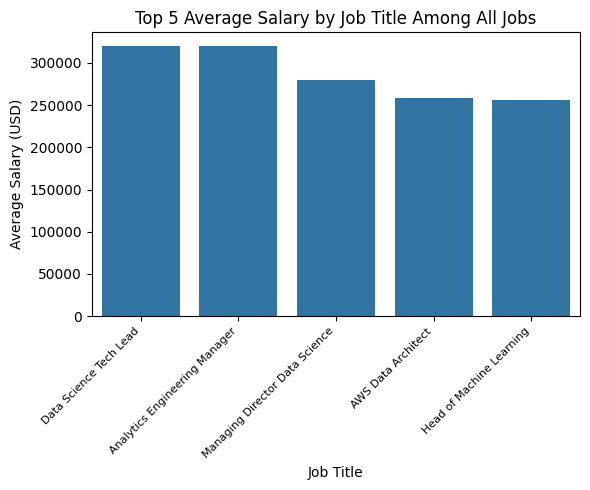

In [69]:
# Calculate the average salary for each job title
avg_salary_by_title = data.groupby(['job_title'])['salary_in_usd'].mean()

# Sort the average salaries in descending order
sorted_avg_salary = avg_salary_by_title.sort_values(ascending=False)

# Get the top  5 average salaries
top_5_avg_salary = sorted_avg_salary.head(5)

# Convert the Series to a DataFrame
top_5_avg_salary = top_5_avg_salary.reset_index()

# Plot the combined average salaries using seaborn
plt.figure(figsize=(6, 5))
ax = sns.barplot(x='job_title', y='salary_in_usd', data=top_5_avg_salary) # Pass the DataFrame to the data argument
plt.title('Top 5 Average Salary by Job Title Among All Jobs')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right', size=8)
plt.tight_layout()
plt.show()

# **Preparing data for machine learning classification algorithms**

**Label Encoding**

In [70]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['experience_level'] = label_encoder.fit_transform(data['experience_level'])
data['employment_type'] = label_encoder.fit_transform(data['employment_type'])
data['job_title'] = label_encoder.fit_transform(data['job_title'])
data['employee_residence'] = label_encoder.fit_transform(data['employee_residence'])
data['company_location'] = label_encoder.fit_transform(data['company_location'])
data['company_size'] = label_encoder.fit_transform(data['company_size'])


In [71]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,3,2,2,202730,84,0,74,1
1,2024,3,2,2,92118,84,0,74,1
2,2024,3,2,57,130500,84,0,74,1
3,2024,3,2,57,96000,84,0,74,1
4,2024,3,2,115,190000,84,0,74,1


# classification algorithms

**Naive bayes classifier**

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


x = data.drop('company_size', axis = 1)
y = data['company_size']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy*100}%')
print('Classification Report:')
print(report)

Accuracy: 85.18518518518519%
Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.06      0.07       192
           1       0.93      0.92      0.93      2743
           2       0.12      0.31      0.17        62

    accuracy                           0.85      2997
   macro avg       0.38      0.43      0.39      2997
weighted avg       0.86      0.85      0.86      2997



**Decision Tree Classifier**

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

x = data.drop('company_size', axis = 1)

y = data['company_size']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy*100}%')
print('Classification Report:')
print(report)

Accuracy: 85.18518518518519%
Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.06      0.07       192
           1       0.93      0.92      0.93      2743
           2       0.12      0.31      0.17        62

    accuracy                           0.85      2997
   macro avg       0.38      0.43      0.39      2997
weighted avg       0.86      0.85      0.86      2997



**K-Nearest Neighbors Classifier**

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

x = data.drop('company_size', axis = 1)

y = data['company_size']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

n_neighbors = 5
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy*100}%')
print('Classification Report:')
print(report)


Accuracy: 92.15882549215883%
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.30      0.37       192
           1       0.94      0.98      0.96      2743
           2       0.42      0.08      0.14        62

    accuracy                           0.92      2997
   macro avg       0.61      0.45      0.49      2997
weighted avg       0.90      0.92      0.91      2997

